# Python for Data Science Practice Session 2: Economics and Finance

# Stock price prediction using Monte Carlo Simulation

In the following notebook, we will use the Monte Carlo simulation to predict the stock price movement. A Monte Carlo simulation model is used to estimate the probability of the different outcomes when they depend on some random variables. It is used in various fields, including finance, engineering, supply chain, and science. In this practice session, we will try to predict possible stock prices 50 days from now. We will work on the most recent data from Yahoo Finance and use Google stock (ticker = "GOOG"), but you can perform the same analysis on any other stock of your interest.

We will begin this notebook by importing the necessary things for our program to run.

In [317]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yfin
yfin.pdr_override()


We need to create a new data frame and import the data from Yahoo finance using the [DataReader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo) function (start from 01-01-2020, take only `Adj Close` column). Once you've downloaded the data, you can use `.plot()` plot it to get a grasp of the historical price movement.

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: title={'center': 'Google Stock Price'}, xlabel='Date'>

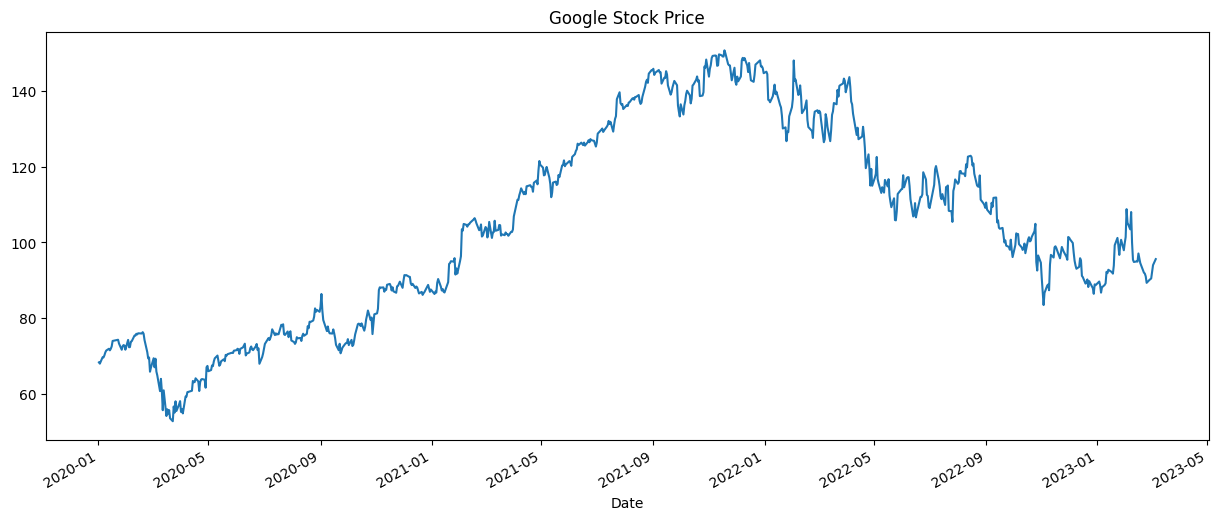

In [318]:
df = pd.DataFrame()
df['GOOG'] = wb.DataReader('GOOG', '2020-01-01')['Adj Close']
df.plot(figsize=(15,6), title="Google Stock Price", legend=None)

The next step will be to calculate the necessary variables to perform the Monte Carlo Simulation. Formulas are as following:

$$ logarithmic\;returns = log(1 + daily\;percentage\;change) $$
$$ drift = average\;logarithmic\;return + 0.5*variance\;of\;logarithmic\;returns $$

(you can use `.log()`, `.pct_change()`, `.mean()` and `.var()`)

Since this notebook is not strictly focusing on the Monte Carlo Method itself, we won't be going into details about how it works. However, if you want to find more information, you can find them [here](https://www.investopedia.com/terms/m/montecarlosimulation.asp).

In [249]:
df['logreturn']= np.log(data['GOOG'].pct_change()+1)
meanreturn= df['logreturn'].mean()
varreturn = df['logreturn'].var()
drift = meanreturn-0.5*varreturn

Now specify the number of days ahead that we want to predict (50), the number of trials that we want to perform ( let's say 100), and create the array with our predicted daily price change. To do this, first, create the array filled with random variables ( random variables should be normally distributed - you can use [this function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) and then apply the following formula:

$$ daily\;returns = e^{drift\;+\;standard\;deviation\;of\;logarithmic\;returns\;*\;random\;variable} $$

In [192]:
days = 50
N = 100
error=norm.ppf(np.random.rand(days,N))
daily_returns = np.exp(drift+np.sqrt(varreturn)*error)

Then, combining those results with our price data we can predict the stock price movement for the next 50 days (using daily returns and the last available price data we can predict the price movement over the next 50 days). Combine those in new dataframe (you can use [.zeros_like()](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html)).

In [193]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = df['GOOG'].tail(1)
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]


Our results are in the NumPy array. To plot them with PyPlot we need to convert them into Pandas Dataframe. Then we can plot it to see what kind of price movement our Monte Carlos simulation predict!

<AxesSubplot: title={'center': 'Predicted Google Stock Price'}>

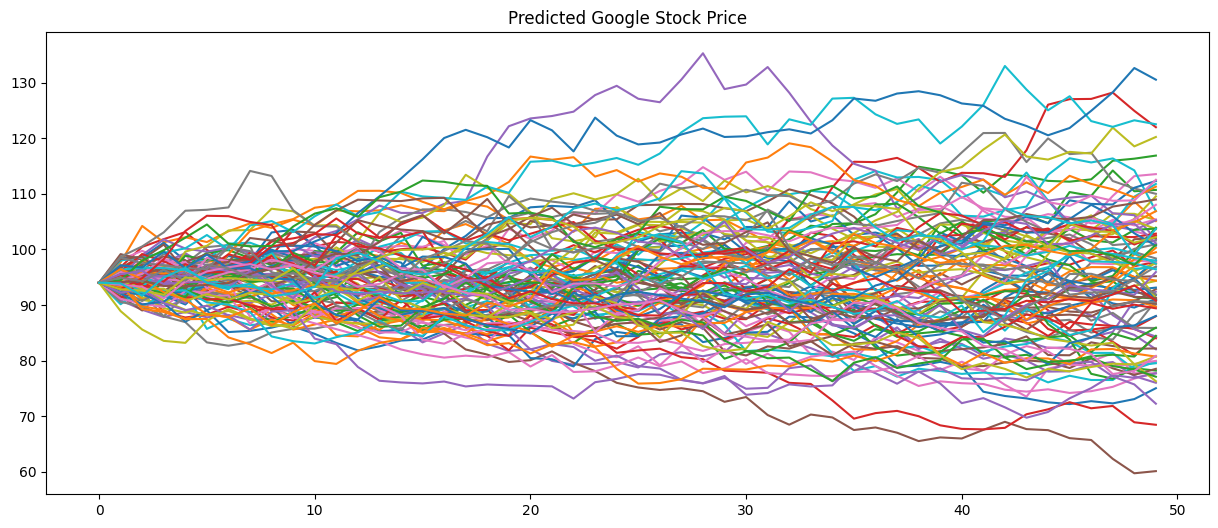

In [194]:
price_paths = pd.DataFrame(price_paths)
price_paths.plot(figsize=(15,6), title="Predicted Google Stock Price", legend=None)

It looks messy. We need to edit the graph and the dataset to make it look nicer.

In order to do it, we will combine our prediction with the historical price data, set all line colours to the same colour and change the transparency of the graph.

Start by creating the dataframe called historical data. It should have the same historical data which you have downloaded at the beginning, but instead of one - 100 rows (which is the number of our trials).

In [195]:
historical_data = pd.DataFrame(index=np.arange(798), columns=np.arange(100))

In [196]:
for i in range(0, 798):
    historical_data.iloc[i,0] = data.iloc[i,0]
for t in range(0, 100):
    historical_data.iloc[:,t] = historical_data.iloc[:,0]
historical_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,...,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685,68.3685
1,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,...,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997,68.032997
2,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,...,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503,69.710503
3,69.667,69.667,69.667,69.667,69.667,69.667,69.667,69.667,69.667,69.667,...,69.667,69.667,69.667,69.667,69.667,69.667,69.667,69.667,69.667,69.667
4,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,...,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003,70.216003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,...,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998,90.099998
794,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,...,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003,90.300003
795,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,...,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002,90.510002
796,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,...,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998,92.309998


To add our predicted stock price movement at the end of our historical data, we need to increase the index number by the number of rows in our historical data dataframe.

In [197]:
price_paths.index= np.add(price_paths.index,798)

To combine two dataframes you can use [.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

In [200]:
result=pd.concat([historical_data,price_paths])

However, in the final dataframe, instead of the index as numbers, we would like to have dates as an index. You can fix it using [date_range()](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html).

In [201]:
result.index=pd.date_range("2020-01-01", periods=len(result.index), freq="D")

Now show our final dataframe. Set the colour to black and transparency to 0.1.

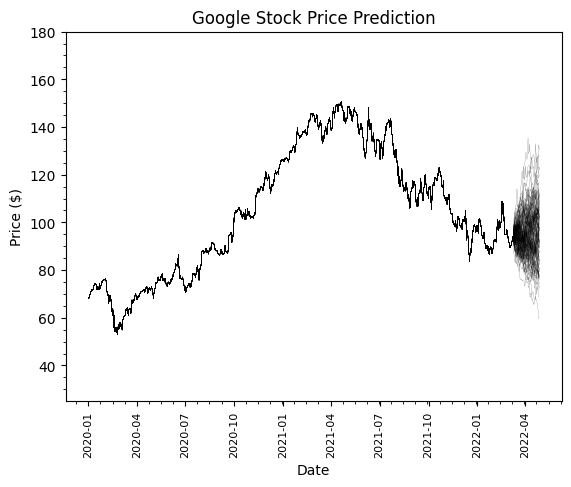

In [206]:
fig, ax = plt.subplots()
ax.plot(result.index, result,lw=0.1,color='black')
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Price ($)')
ax.set_ylim(25, 180)
ax.set_title('Google Stock Price Prediction')
ax.minorticks_on()
plt.show()

It looks way better! We can also make a histogram from the prices on the last day in our prediction (last row in our dataframe).

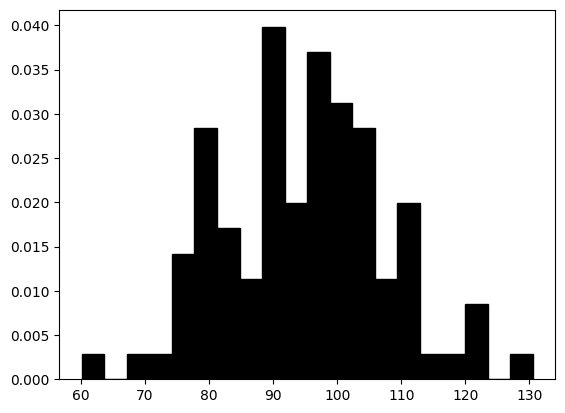

In [224]:
fig, ax = plt.subplots()
ax.hist(result.iloc[847,:], density=True, bins = 20,
         edgecolor='black')
plt.show()

# Moving Averages #

Sometimes to perform the technical analysis, we would like to plot moving averages on top of our price data. To do that, first, add two empty rows to our dataframe (called "MA_1" and "MA_2").

In [297]:
df['MA20']=0
df['MA50']=0

#

,GOOG,logreturn,MA20,MA50
Date,,,,
2020-01-02,68.368500,NaN,0,0
2020-01-03,68.032997,-0.004919,0,0
2020-01-06,69.710503,0.024358,0,0
2020-01-07,69.667000,-0.000624,0,0
2020-01-08,70.216003,0.007850,0,0
...,...,...,...,...
2023-02-27,90.099998,0.008359,0,0
2023-02-28,90.300003,0.002217,0,0
2023-03-01,90.510002,0.002323,0,0


Then, use loops to calculate the moving average for 20 and 50 days. (The 20/50 days moving average is an average price from the past 20/50 days)

In [298]:
t1=20
for t in range(0,df.shape[0]):
    if t==0:
        df.iloc[t,2]=data.iloc[0,0]
    elif t <t1:
        df.iloc[t,2]=data.iloc[0:t,0].mean()
    else:
        df.iloc[t,2]=data.iloc[t-t1:t,0].mean()

df.iloc[:,2]


Date
2020-01-02    68.368500
2020-01-03    68.368500
2020-01-06    68.200748
2020-01-07    68.704000
2020-01-08    68.944750
                ...    
2023-02-27    97.875000
2023-02-28    97.344500
2023-03-01    96.962000
2023-03-02    96.494000
2023-03-03    96.038000
Name: MA20, Length: 798, dtype: float64

In [299]:
t2=50
for t in range(0,df.shape[0]):
    if t==0:
        df.iloc[t,3]=data.iloc[0,0]
    elif t <t2:
        df.iloc[t,3]=data.iloc[0:t,0].mean()
    else:
        df.iloc[t,3]=data.iloc[t-t2:t,0].mean()
df

,GOOG,logreturn,MA20,MA50
Date,,,,
2020-01-02,68.368500,NaN,68.368500,68.368500
2020-01-03,68.032997,-0.004919,68.368500,68.368500
2020-01-06,69.710503,0.024358,68.200748,68.200748
2020-01-07,69.667000,-0.000624,68.704000,68.704000
2020-01-08,70.216003,0.007850,68.944750,68.944750
...,...,...,...,...
2023-02-27,90.099998,0.008359,97.875000,94.233600
2023-02-28,90.300003,0.002217,97.344500,94.118600
2023-03-01,90.510002,0.002323,96.962000,94.018400


Now plot the historical price data with moving averages.

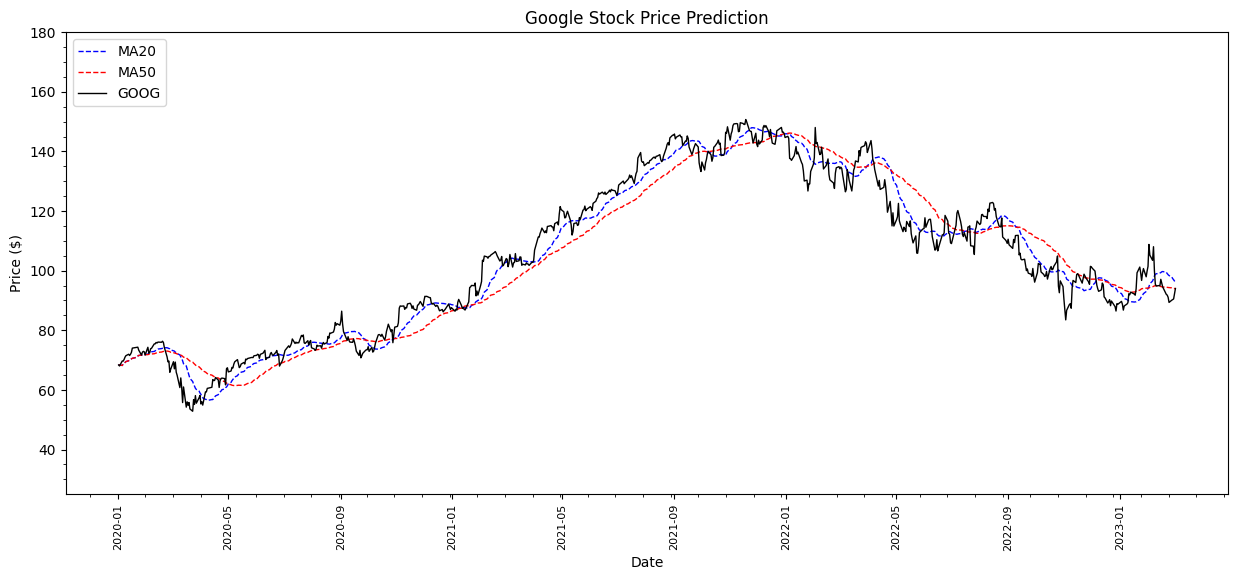

In [300]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df.iloc[:,2],lw=1,color='blue',ls='--')
ax.plot(df.iloc[:,3],lw=1,color='red',ls='--')
ax.plot(df.iloc[:,0],lw=1,color='black')
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Price ($)')
ax.set_ylim(25, 180)
ax.set_title('Google Stock Price Prediction')
ax.minorticks_on()
cols = ['MA20','MA50','GOOG']
ax.legend(cols,loc="upper left")
plt.show()

The MACD is a common trading strategy. It is based on two lines: the first represents the difference between the two moving averages and the second one is a moving average of this difference. Create a new data frame called MACD and using the moving averages that you've already calculated, create lines necessary for MACD trading strategy. (You can additionally add a horizontal line that shows zero. To do this just add a row filled with zeros.) If you want to lear more about MACD strategy, visit [this link](https://www.investopedia.com/terms/m/macd.asp).

In [302]:
#
MACD = pd.DataFrame()
MACD['Diff']=df['MA50']-df['MA20']
MACD['MA']=0
MACD['line']=0
for t in range(0,MACD.shape[0]):
    if t==0:
        MACD.iloc[t,1]= MACD.iloc[0,0]
    if t<10:
        MACD.iloc[t,1]=MACD.iloc[0:t,0].mean()
    if t>10:
        MACD.iloc[t,1]-MACD.iloc[t-10:t,0].mean()
        
#
#
#

Now plot the MACD lines on a second graph below the graph with moving averages.

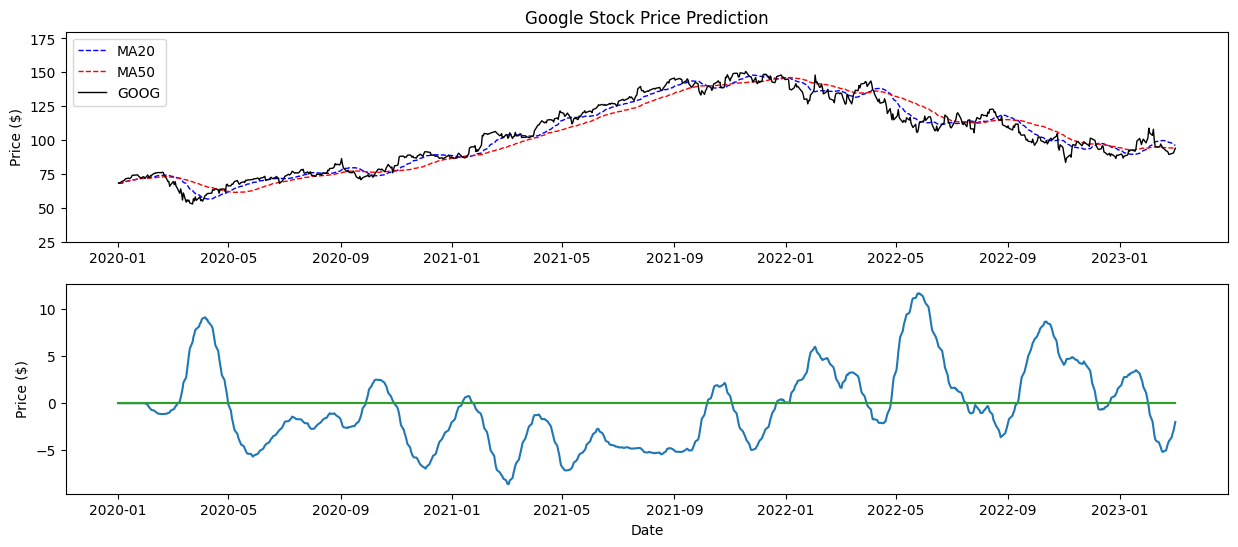

In [315]:
fig, axs = plt.subplots(2,1,figsize=(15,6))
axs[0].plot(df.iloc[:,2],lw=1,color='blue',ls='--')
axs[0].plot(df.iloc[:,3],lw=1,color='red',ls='--')
axs[0].plot(df.iloc[:,0],lw=1,color='black')
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Price ($)')
axs[1].set_ylabel('Price ($)')
axs[0].set_ylim(25, 180)
axs[0].set_title('Google Stock Price Prediction')
cols = ['MA20','MA50','GOOG']
axs[0].legend(cols,loc="upper left")
axs[1].plot(MACD)
plt.show()